  File Number          Date of Report           Crime Date Time  \
0  2009-00002  01/01/2009 12:39:00 AM               1/1/09 0:39   
1  2009-00003  01/01/2009 01:34:00 AM               1/1/09 1:34   
2  2009-00004  01/01/2009 01:43:00 AM  01/01/2009 02:20 - 02:35   
3  2009-00005  01/01/2009 02:27:00 AM  01/01/2009 02:20 - 02:45   
4  2009-00006  01/01/2009 02:34:00 AM  01/01/2009 02:15 - 02:35   

                Crime  Reporting Area    Neighborhood  \
0      Simple Assault           504.0   Cambridgeport   
1      Simple Assault           610.0   Mid-Cambridge   
2  Aggravated Assault           708.0       Riverside   
3      Simple Assault           105.0  East Cambridge   
4          Disorderly           708.0       Riverside   

                                            Location  
0            400 Massachusetts Avenue, Cambridge, MA  
1                200 HAMPSHIRE STREET, Cambridge, MA  
2  DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...  
3                100 SCIARAPPA STR

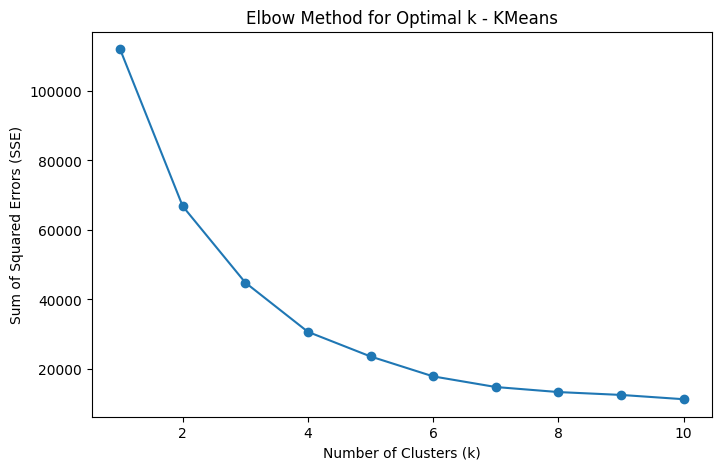

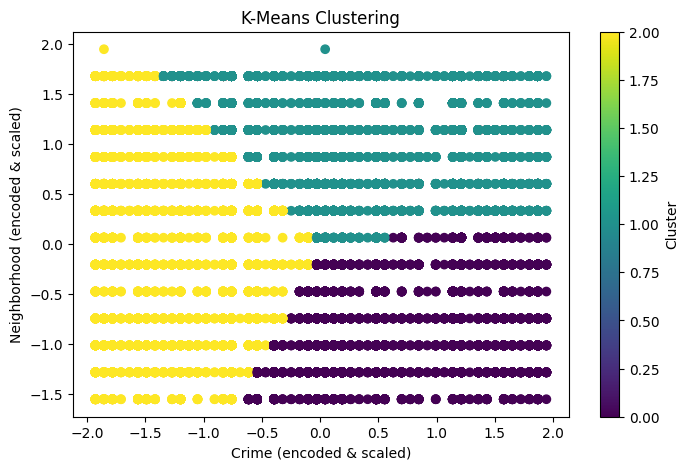

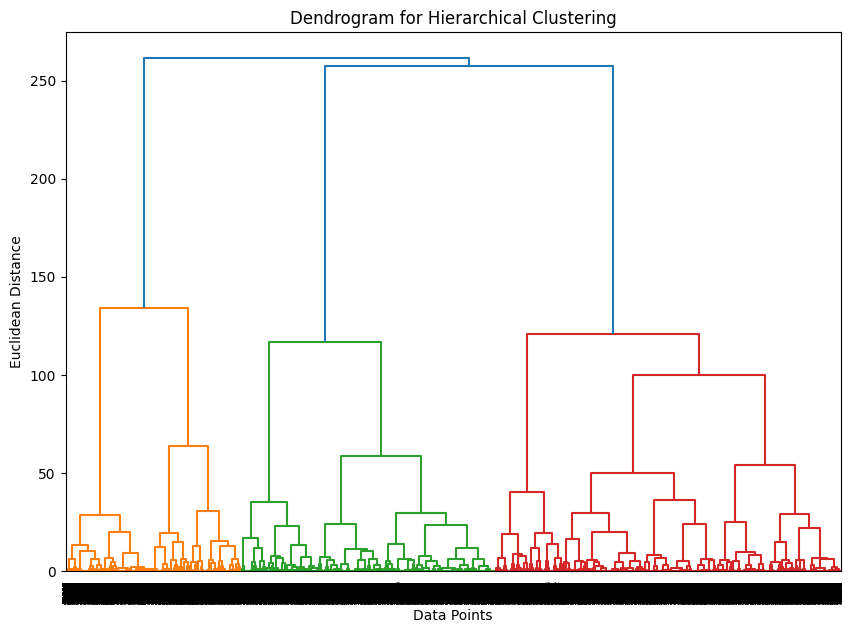

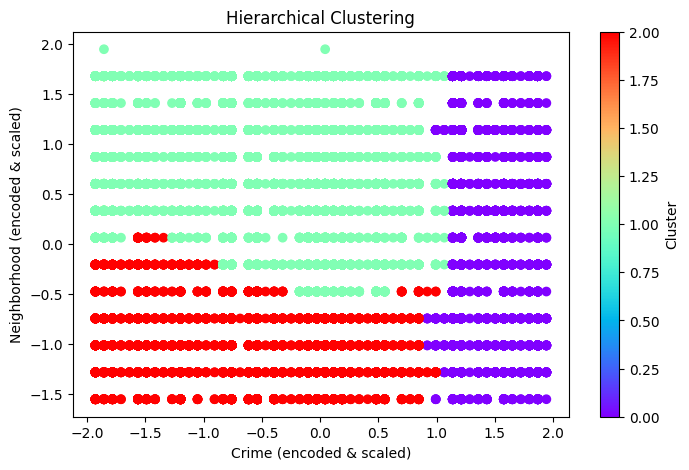

K-Means Cluster Counts:
KMeans_cluster
1    19666
0    18896
2    17452
Name: count, dtype: int64

Hierarchical Cluster Counts:
Hierarchical_cluster
1    24905
2    18343
0    12766
Name: count, dtype: int64


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
import scipy.cluster.hierarchy as sch



file_path = r"C:\Users\justino\Downloads\Cambridge Crime Data 2009-2016.csv"


df = pd.read_csv(file_path)


print(df.head())



features = ['Crime', 'Neighborhood']

# Check that the required columns exist
for feature in features:
    if feature not in df.columns:
        raise ValueError(f"Column '{feature}' not found in the dataset. Please verify the column names.")

# Encode categorical variables into numeric values using LabelEncoder
le_crime = LabelEncoder()
df['Crime_encoded'] = le_crime.fit_transform(df['Crime'])

le_neighborhood = LabelEncoder()
df['Neighborhood_encoded'] = le_neighborhood.fit_transform(df['Neighborhood'])

# Create a feature matrix for clustering
X = df[['Crime_encoded', 'Neighborhood_encoded']].values

# Scale features for improved clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------- 2. K-Means Clustering -------------------

# Use the elbow method 
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE vs. number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k - KMeans')
plt.show()


optimal_k = 3  # Adjust this value based on your elbow plot observation

# Fit the K-Means model with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add the K-Means cluster labels to the DataFrame
df['KMeans_cluster'] = kmeans_labels

# Visualize the K-Means clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel('Crime (encoded & scaled)')
plt.ylabel('Neighborhood (encoded & scaled)')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

# ------------------- 3. Hierarchical Clustering -------------------


plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# Based on the dendrogram, set the optimal number of clusters
optimal_k_hc = 3  # Adjust this value based on your dendrogram observation

# Fit the Hierarchical Clustering model
hc = AgglomerativeClustering(n_clusters=optimal_k_hc, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

# Add the Hierarchical cluster labels to the DataFrame
df['Hierarchical_cluster'] = hc_labels

# Visualize the Hierarchical clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hc_labels, cmap='rainbow')
plt.xlabel('Crime (encoded & scaled)')
plt.ylabel('Neighborhood (encoded & scaled)')
plt.title('Hierarchical Clustering')
plt.colorbar(label='Cluster')
plt.show()

# ------------------- 4. Comparison of Models -------------------

# Display a basic comparison of cluster sizes for both methods
print("K-Means Cluster Counts:")
print(df['KMeans_cluster'].value_counts())

print("\nHierarchical Cluster Counts:")
print(df['Hierarchical_cluster'].value_counts())
